In [2]:
import numpy as np # linear algebra
import pandas as pd
df=pd.read_csv('autos.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55220 entries, 0 to 55219
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                55220 non-null  int64  
 1   dateCrawled          55220 non-null  object 
 2   name                 55220 non-null  object 
 3   seller               55220 non-null  object 
 4   offerType            55219 non-null  object 
 5   price                55219 non-null  float64
 6   abtest               55219 non-null  object 
 7   vehicleType          49535 non-null  object 
 8   yearOfRegistration   55219 non-null  float64
 9   gearbox              52234 non-null  object 
 10  powerPS              55219 non-null  float64
 11  model                52181 non-null  object 
 12  kilometer            55219 non-null  float64
 13  monthOfRegistration  55219 non-null  float64
 14  fuelType             50161 non-null  object 
 15  brand                55219 non-null 

In [4]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,...,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,...,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,...,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,...,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,...,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


In [5]:
df['yearOfRegistration'].value_counts()

,count
yearOfRegistration,
2000.0,3644
1999.0,3339
2005.0,3272
2001.0,3071
2006.0,3034
2003.0,2964
2004.0,2911
2002.0,2823
1998.0,2690


In [6]:
# handle missing values
df.fillna(0, inplace=True)  # replace missing values with 0

# check for and address inconsistencies in the data
df = df[df.price > 0]  # remove rows with 0 or negative price
df = df[df.yearOfRegistration > 1900]  # remove rows with yearOfRegistration before 1900
df = df[df.yearOfRegistration <= 2020]  # remove rows with yearOfRegistration after 2020

# format the data in a way that is suitable for analysis
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])  # convert dateCrawled to datetime format
df['yearOfRegistration'] = df['yearOfRegistration'].astype(int)  # convert yearOfRegistration to integer
df['price'] = df['price'].astype(int)  # convert price to integer

In [7]:
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,0,1993,manuell,...,golf,150000.0,0.0,benzin,volkswagen,0,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,0,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000.0,8.0,diesel,jeep,0,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55214,55214,2016-03-05 14:50:22,Mercedes_MB_100_Bus_ex_Feuerwehr__kein_T1_T2_T3,privat,Angebot,2850,control,bus,1990,manuell,...,andere,150000.0,10.0,diesel,mercedes_benz,0,2016-03-05 00:00:00,0.0,34454.0,2016-03-08 06:16:35
55215,55215,2016-03-28 18:50:17,Alfa_Romeo_145_1.4_Twinspark,privat,Angebot,999,control,0,2018,0,...,145,150000.0,0.0,benzin,alfa_romeo,0,2016-03-28 00:00:00,0.0,97509.0,2016-04-07 01:15:55
55216,55216,2016-03-12 19:51:01,BMW_Z4_roadster_3.0i,privat,Angebot,9500,test,cabrio,2004,manuell,...,z_reihe,150000.0,1.0,benzin,bmw,nein,2016-03-12 00:00:00,0.0,77709.0,2016-03-12 19:51:01
55217,55217,2016-03-25 23:45:29,Hyundai_ix35_2.0_2WD_Style_I_Catcher__Navi__Pa...,privat,Angebot,12400,control,suv,2010,manuell,...,i_reihe,125000.0,12.0,benzin,hyundai,nein,2016-03-25 00:00:00,0.0,58840.0,2016-04-05 04:15:30


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
brand_counts = df['brand'].value_counts()
print(brand_counts)

brand
volkswagen        11205
bmw                5881
opel               5761
mercedes_benz      5156
audi               4724
ford               3720
renault            2653
peugeot            1610
fiat               1382
seat               1052
skoda               884
mazda               841
citroen             808
smart               755
nissan              743
toyota              662
hyundai             518
mini                506
sonstige_autos      503
volvo               476
mitsubishi          437
honda               394
kia                 377
suzuki              345
porsche             337
alfa_romeo          317
chevrolet           263
chrysler            196
dacia               127
jeep                119
land_rover          118
daihatsu            109
subaru              107
jaguar               98
trabant              76
daewoo               76
saab                 73
lancia               66
rover                65
lada                 38
Name: count, dtype: int64


In [10]:
import plotly.express as px

In [11]:
# Create a bar chart showing the count of cars for each brand
fig = px.bar(x=brand_counts.index, y=brand_counts.values, labels={'x':'Brand', 'y':'Number of Cars'})
fig.show()

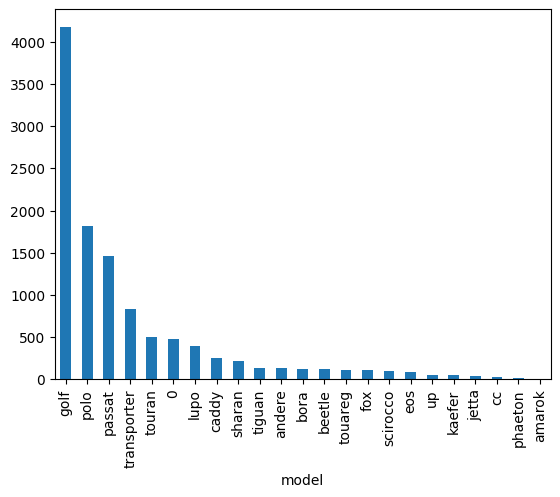

In [12]:
df_volkswagen=df.loc[df.brand == 'volkswagen']
model_counts = df_volkswagen['model'].value_counts().plot(kind='bar')

In [13]:
import pandas as pd

# Extract the top 3 brands from the dataframe
top_brands = df['brand'].value_counts().nlargest(3)

# Create a new dataframe with the models for each brand
models_df = pd.DataFrame()
for brand in top_brands.index:
    models_df[brand] = df[df['brand'] == brand]['model'].value_counts()

<ipython-input-14-4dd3de32322f>:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



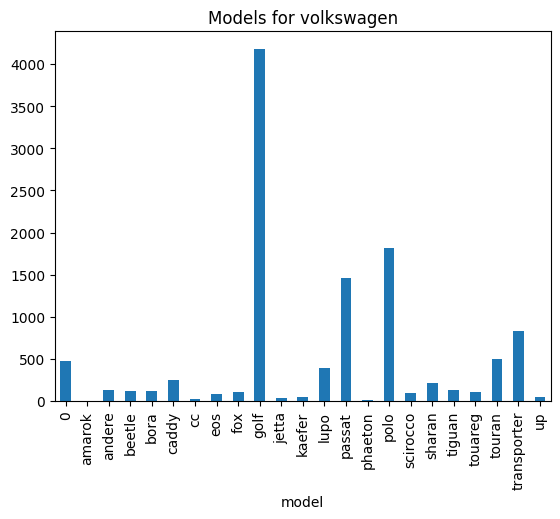

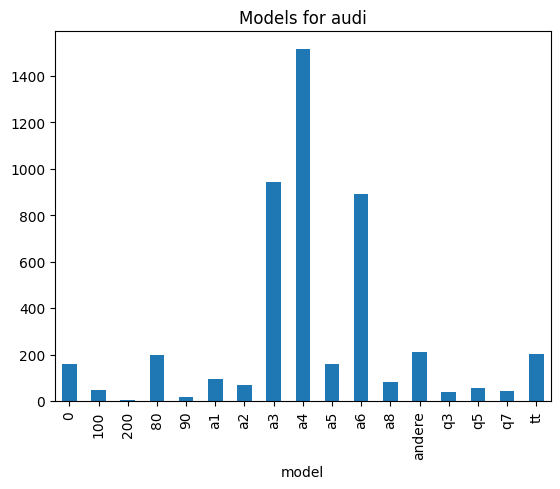

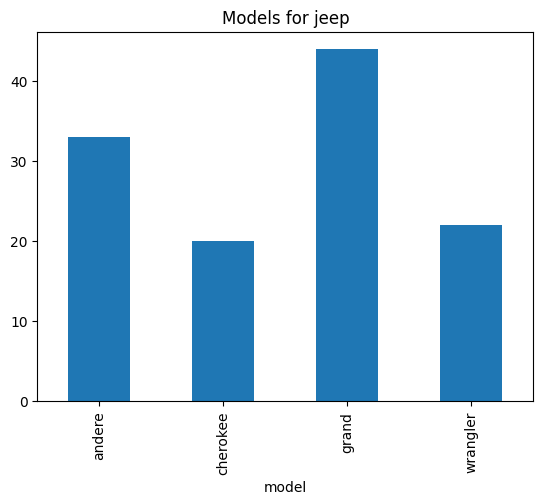

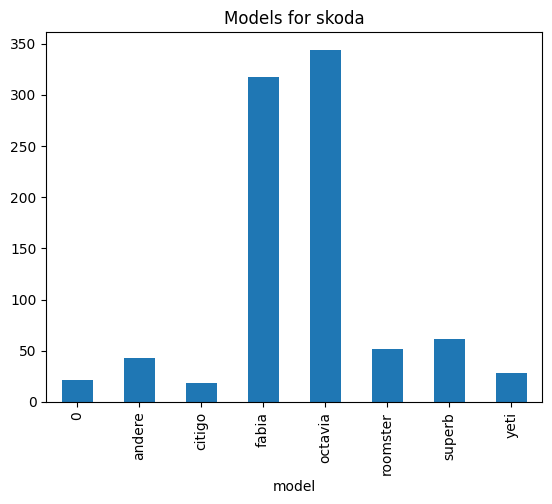

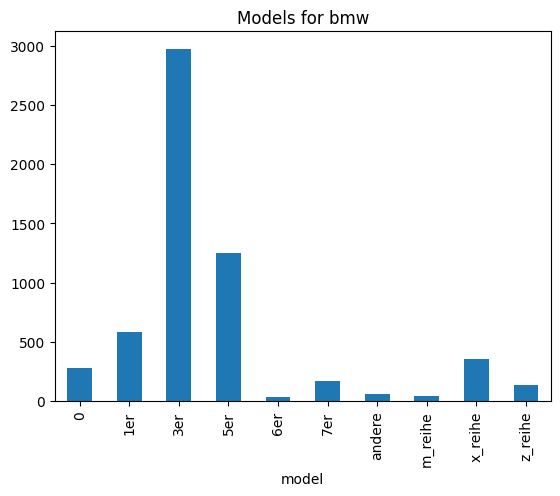

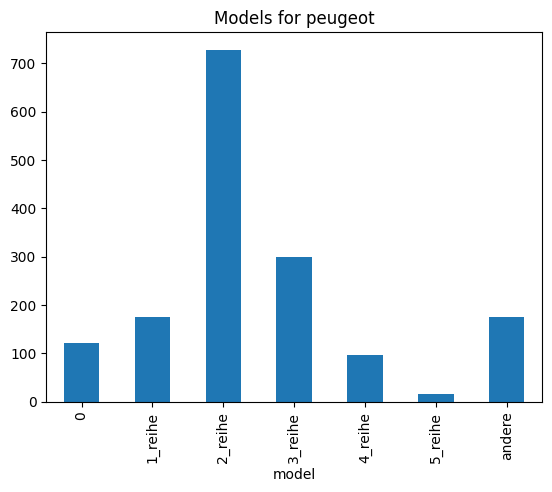

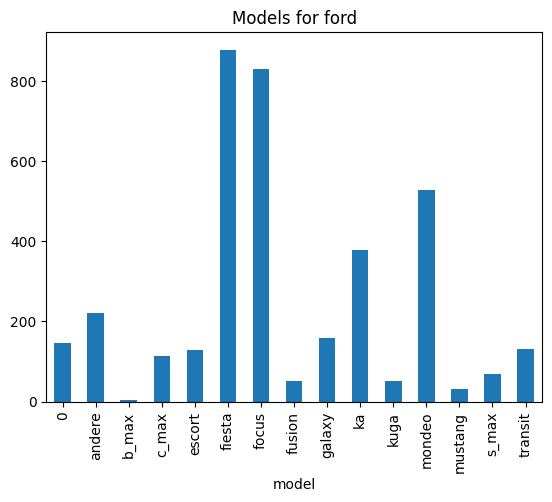

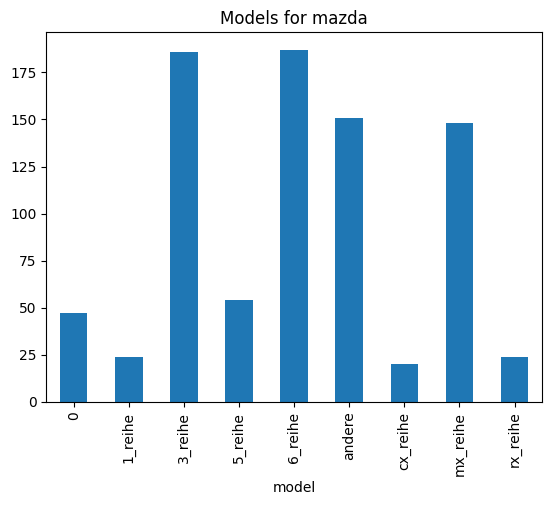

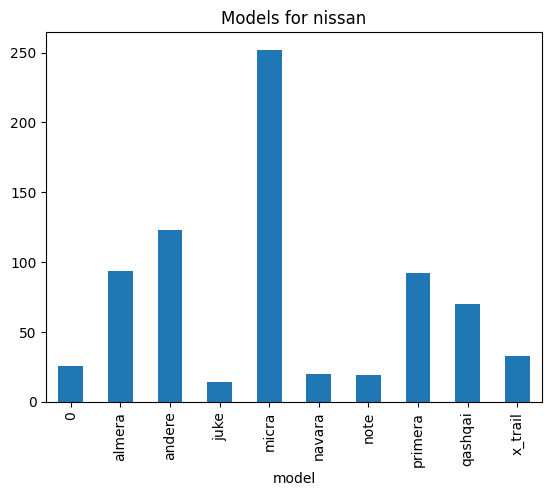

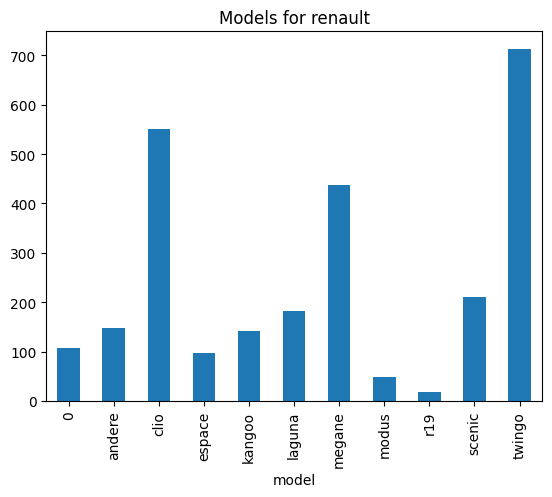

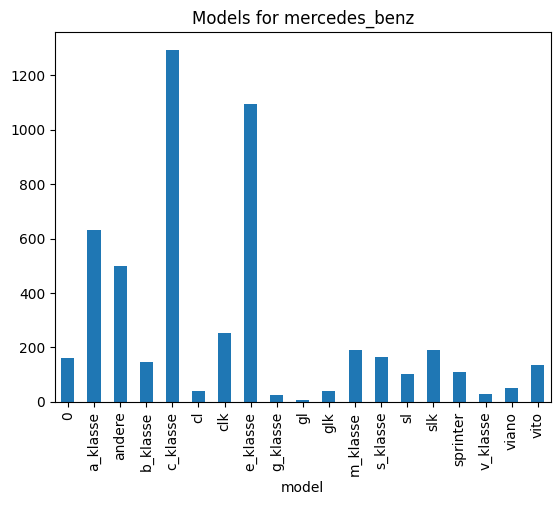

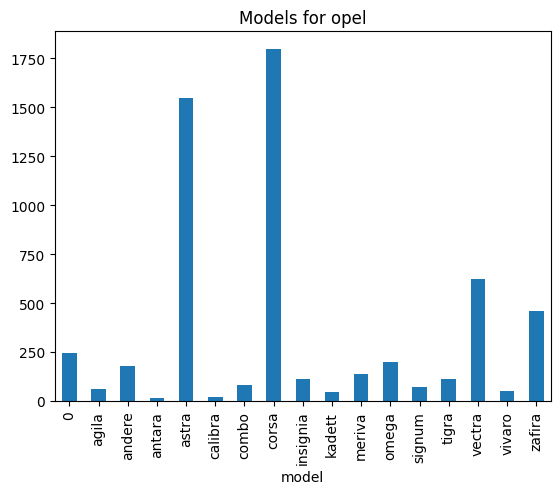

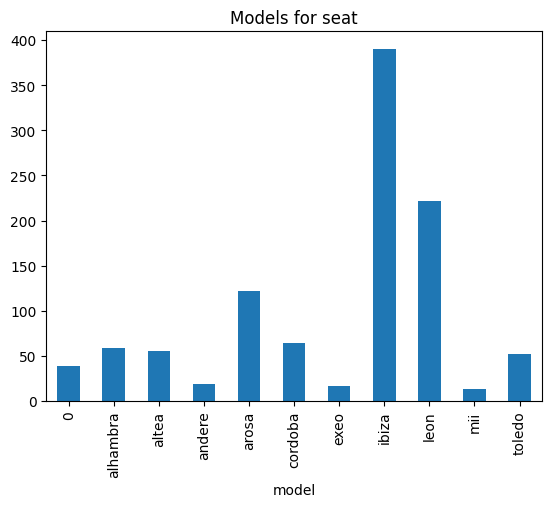

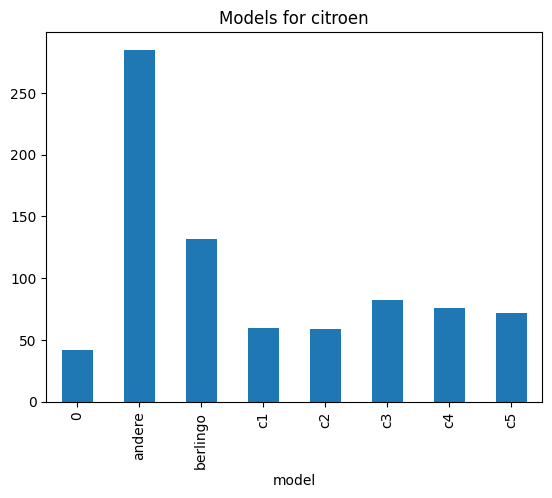

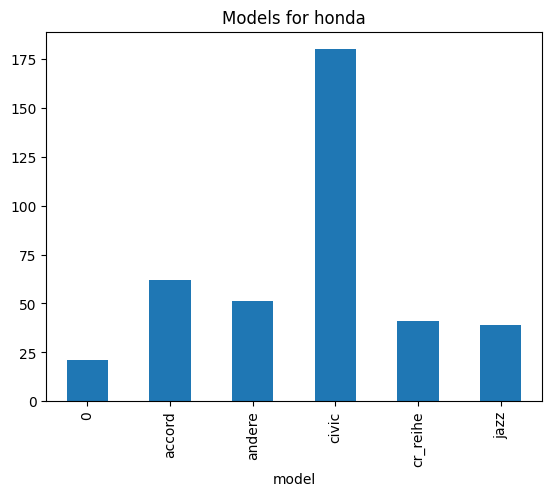

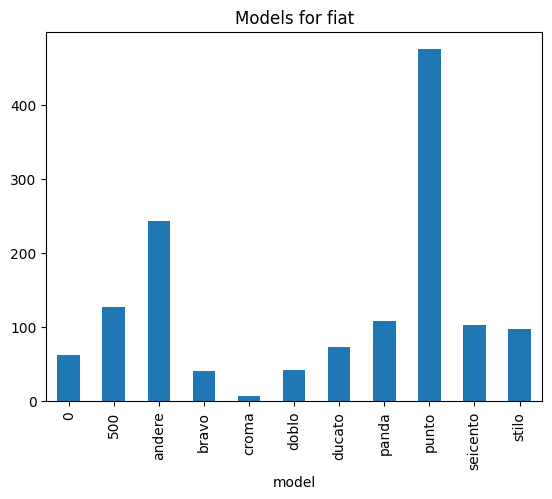

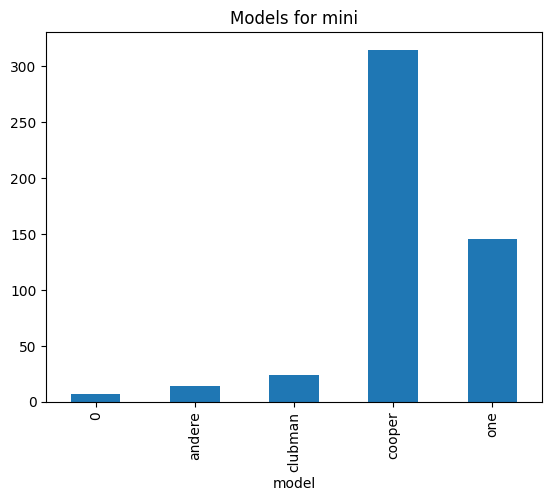

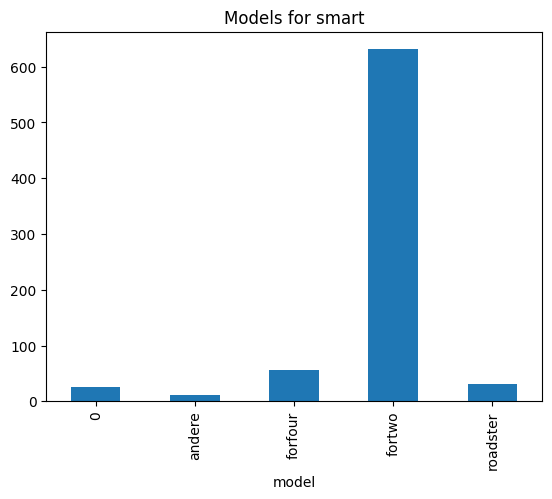

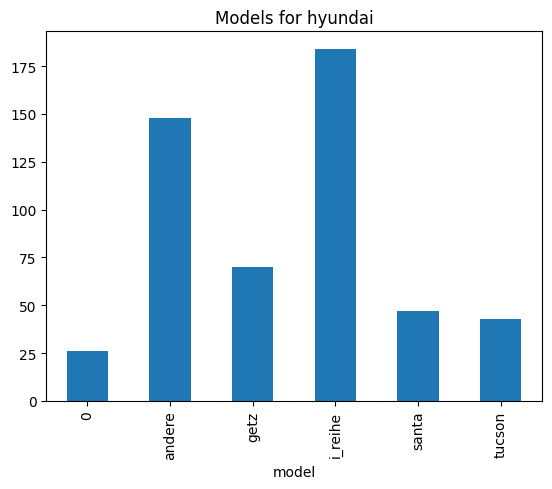

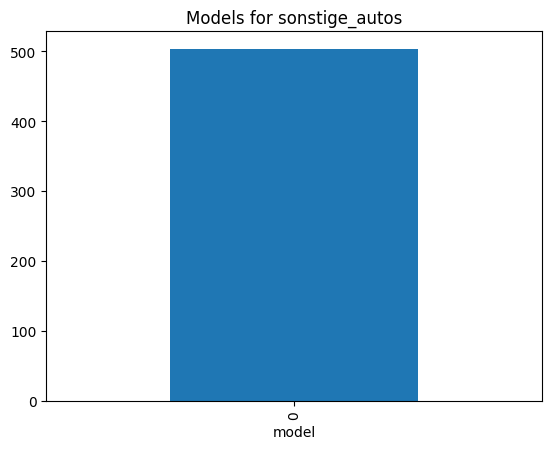

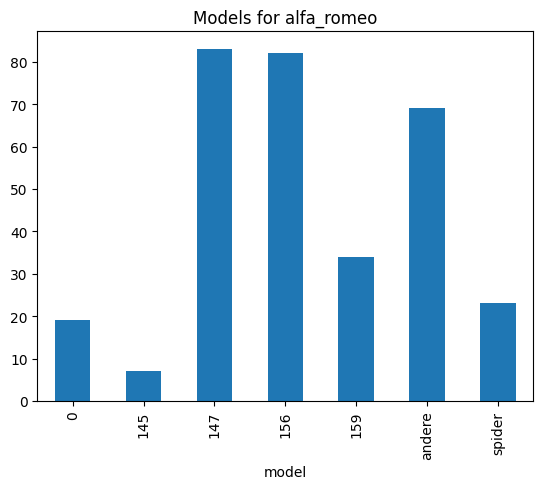

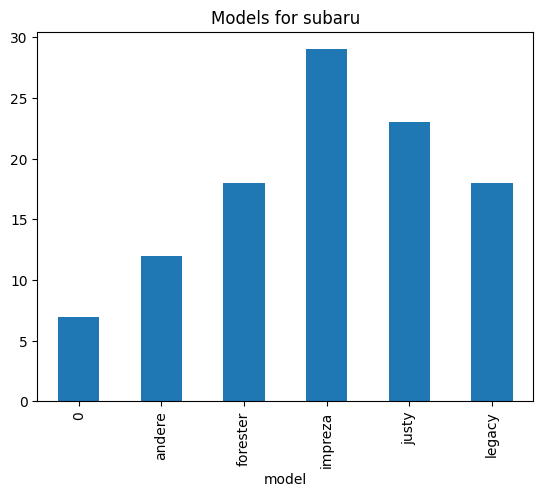

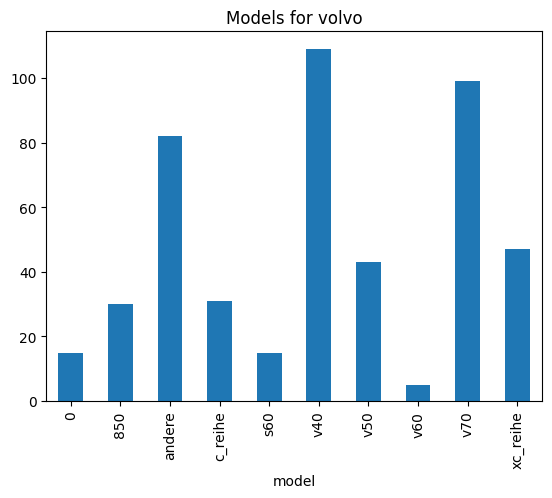

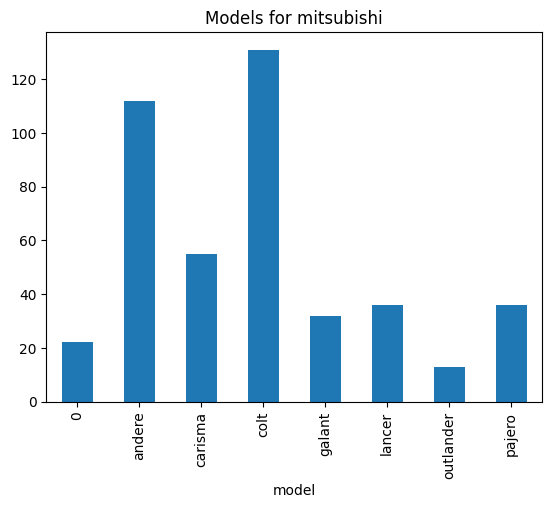

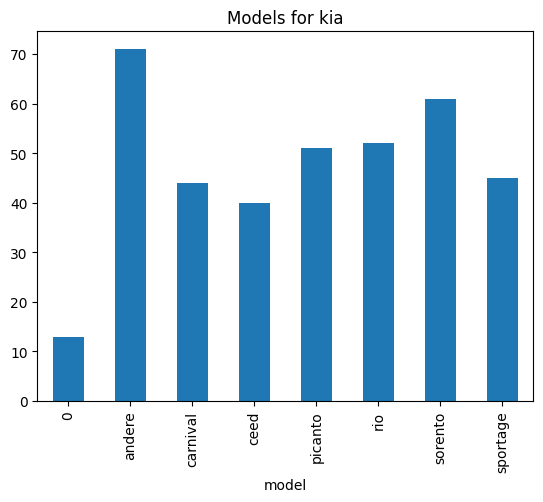

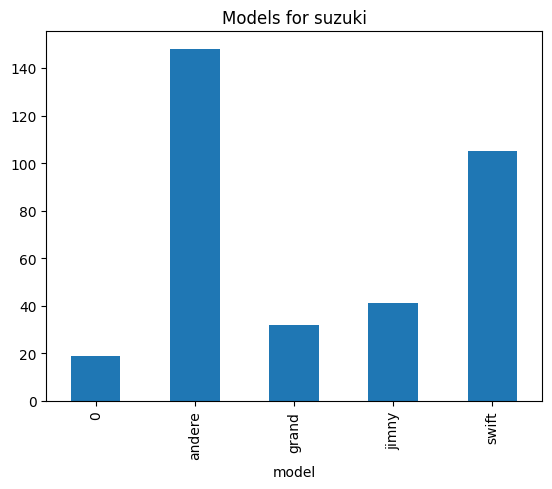

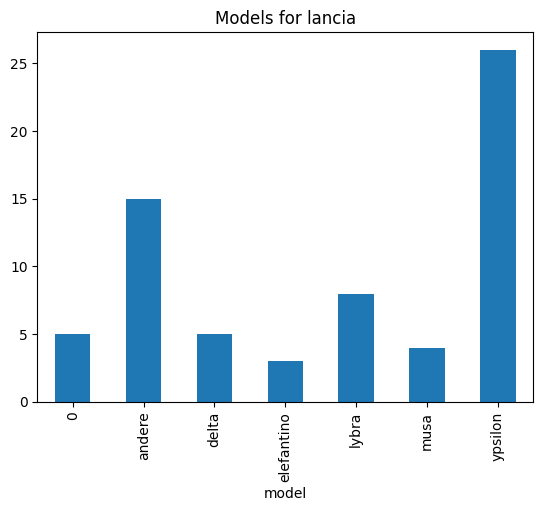

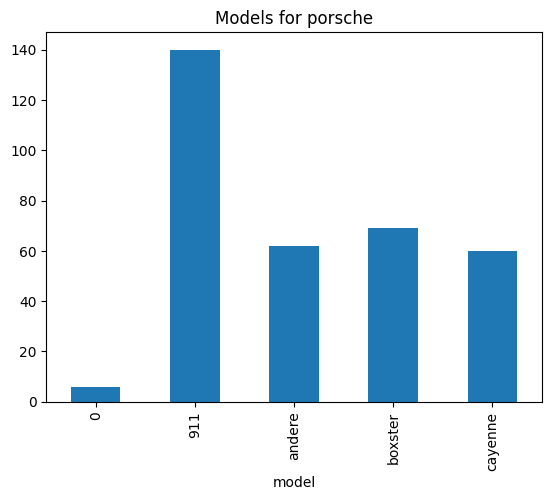

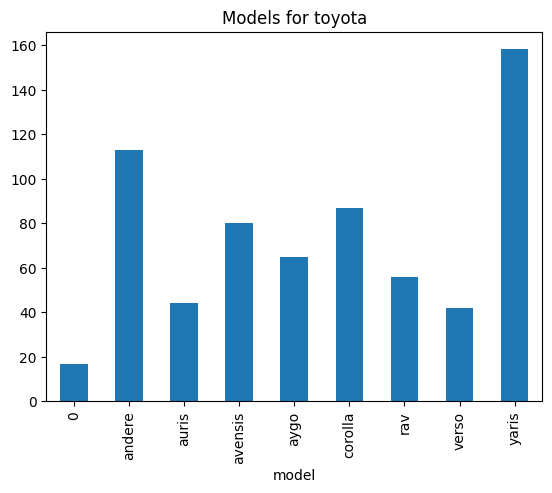

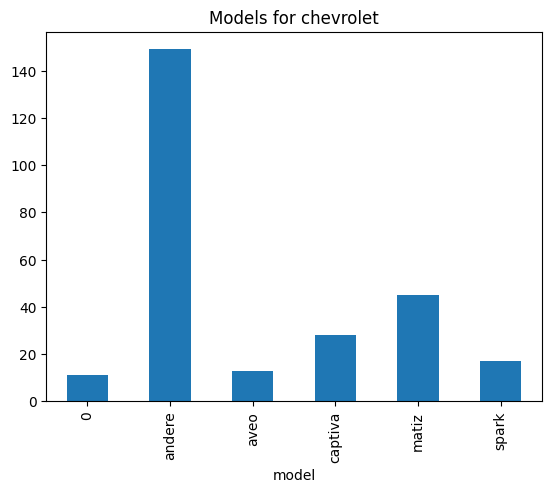

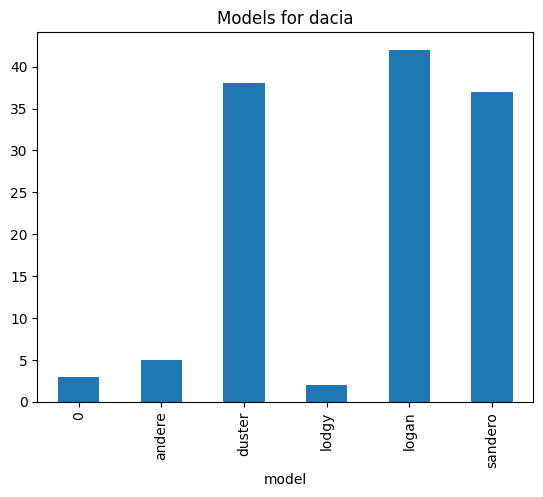

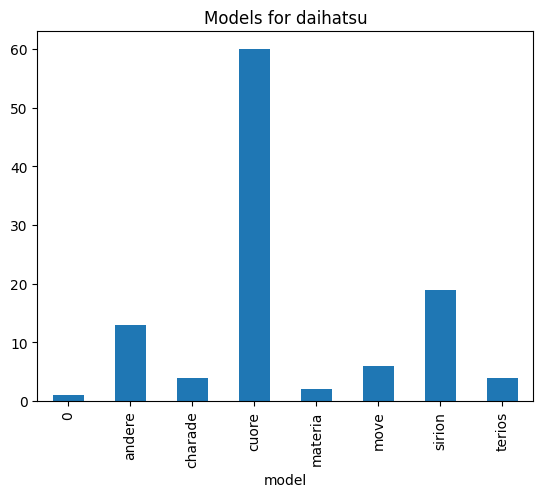

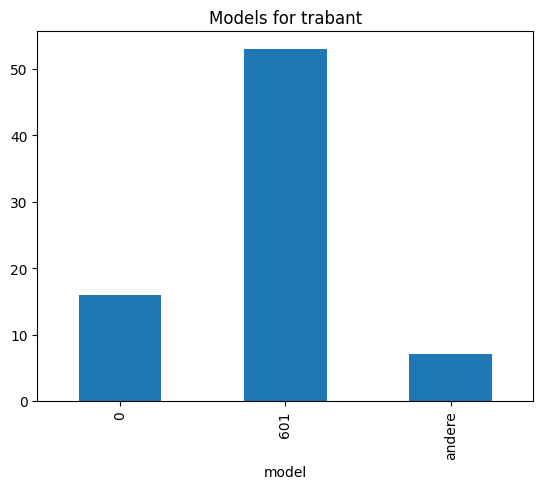

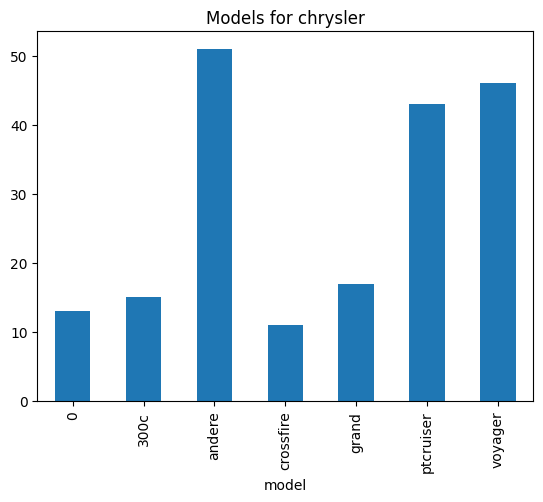

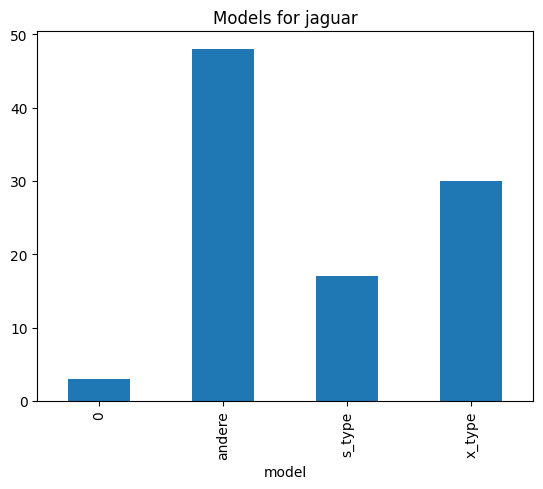

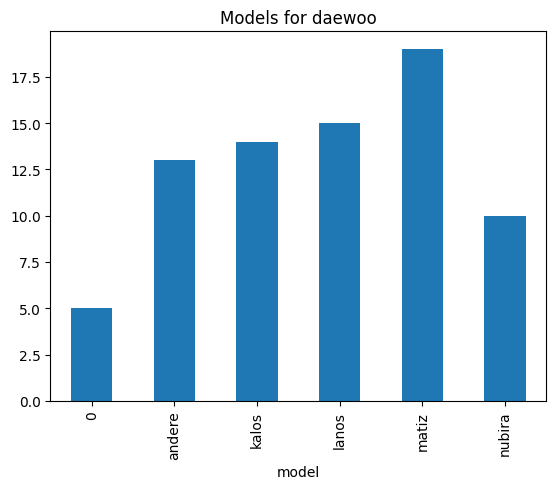

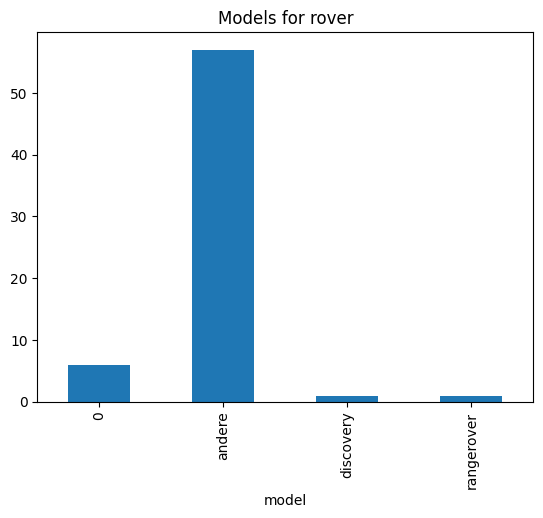

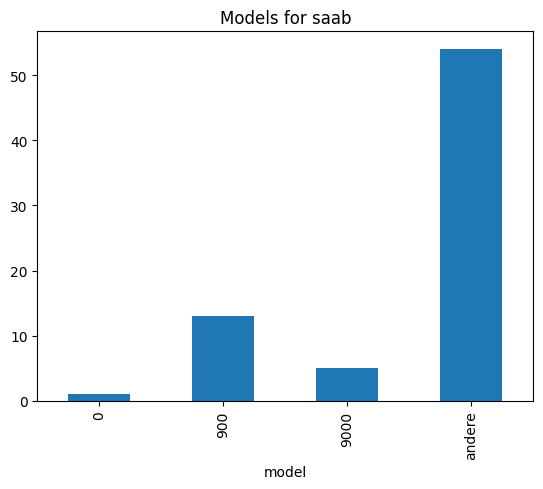

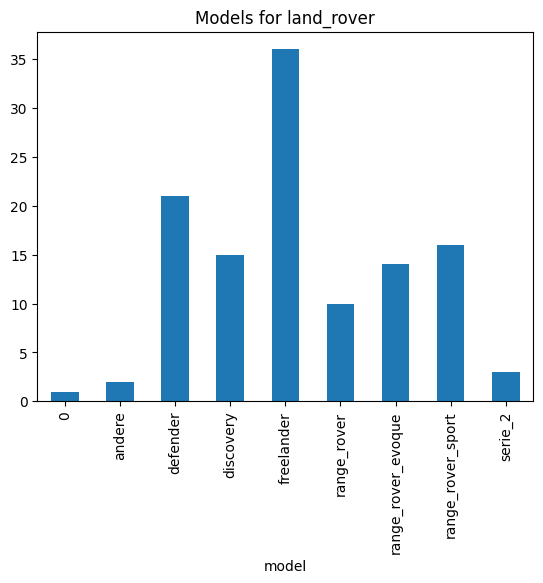

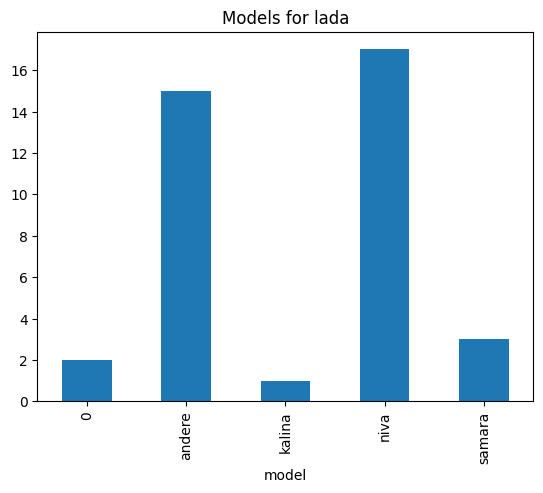

In [14]:
import matplotlib.pyplot as plt

# Loop over the unique values in the 'brand' column
for brand in df['brand'].unique():
    # Create a new DataFrame for the current brand
    df_brand = df.loc[df.brand == brand]

    # Group the DataFrame by 'model' and count the number of occurrences
    model_counts = df_brand.groupby('model').size()

    # Create a bar plot showing the count of each model for the current brand
    plt.figure()
    model_counts.plot(kind='bar')
    plt.title(f'Models for {brand}')

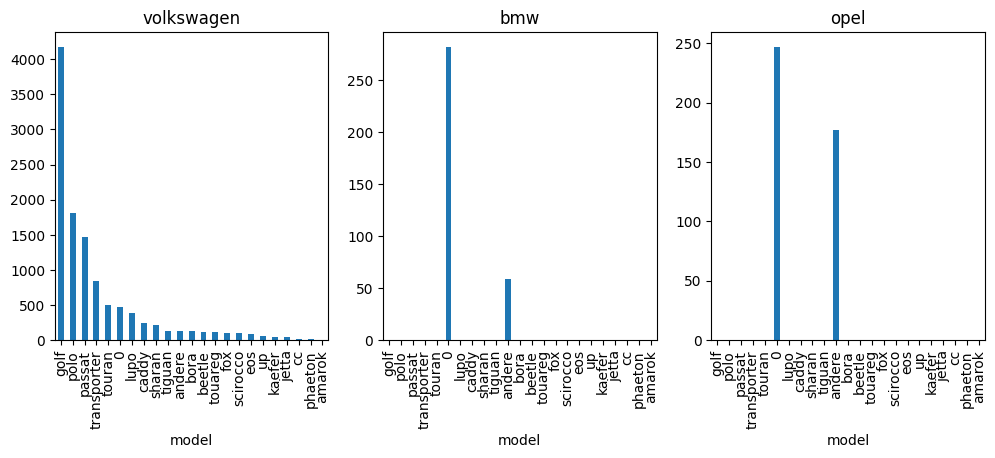

In [15]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot the models for each brand
for i, brand in enumerate(top_brands.index):
    models_df[brand].plot.bar(ax=ax[i])
    ax[i].set_title(brand)

# Show the plot
plt.show()

In [16]:
# Find the model with the highest count for each brand
top_models = {}
for brand in top_brands.index:
    top_model = models_df[brand].idxmax()
    top_models[brand] = top_model
print(top_models)

{'volkswagen': 'golf', 'bmw': 0, 'opel': 0}
